In [1]:
from time import process_time_ns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import lineStyles
import seaborn as sns

In [2]:
df = pd.read_csv("./merged_exports.csv", encoding="utf-8")

In [3]:
df.head()

,Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,10445,41757,8040,33439,57252,12659,47410,86692,14048,...,42176,16124,90747,130265,337434.0,66738.0,106735.0,206527.0,436425.0,231796.0
1,Albania,1835,57242,345902,32580,62837,178499,356963,74111,478958,...,1618564,212182,231858,209558,278787.0,688311.0,775574.0,2195314.0,1295183.0,338654.0
2,Algeria,129069,102523,81832,41049,1483147,292095,23840,32922,545573,...,326281,165876,1172754,1031846,152965.0,659386.0,308976.0,247582.0,1598946.0,1059217.0
3,American Samoa,0,0,0,0,0,37370,6977,0,3703,...,13135,3442251,994797,297901,0.0,9655.0,25402.0,3140.0,15057.0,18784.0
4,Andorra,526684,5364,4125,35418,30657,2274199,571484,820128,506783,...,6162072,8516441,12058059,12851607,14078494.0,16193098.0,9657995.0,11680839.0,18649613.0,25457668.0


In [4]:
# melt the dataframe to long format for easier analysis
df_long = df.melt(id_vars=["Name"], var_name="Year", value_name="Gross Export")
df_long.head()

,Name,Year,Gross Export
0,Afghanistan,1995,10445.0
1,Albania,1995,1835.0
2,Algeria,1995,129069.0
3,American Samoa,1995,0.0
4,Andorra,1995,526684.0


In [5]:
world_total = df_long.groupby('Year')['Gross Export'].sum().reset_index()
world_total['Name'] = 'world'
print(world_total)


    Year  Gross Export   Name
0   1995  1.403554e+11  world
1   1996  1.393498e+11  world
2   1997  1.499751e+11  world
3   1998  1.464418e+11  world
4   1999  1.743083e+11  world
5   2000  2.277043e+11  world
6   2001  1.763041e+11  world
7   2002  1.871257e+11  world
8   2003  2.079248e+11  world
9   2004  2.561593e+11  world
10  2005  2.459961e+11  world
11  2006  2.765008e+11  world
12  2007  3.273685e+11  world
13  2008  2.934666e+11  world
14  2009  2.626118e+11  world
15  2010  3.320918e+11  world
16  2011  3.469937e+11  world
17  2012  3.698685e+11  world
18  2013  4.214326e+11  world
19  2014  4.164095e+11  world
20  2015  4.119401e+11  world
21  2016  4.204530e+11  world
22  2017  5.391622e+11  world
23  2018  5.820545e+11  world
24  2019  5.801177e+11  world
25  2020  6.376282e+11  world
26  2021  7.990851e+11  world
27  2022  8.654253e+11  world
28  2023  7.987710e+11  world


In [6]:
df_long = pd.concat([df_long, world_total], ignore_index=True)

In [7]:
EU = ('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
      'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
      'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
      'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
      'Sweden')
EU_total = df_long[df_long['Name'].isin(EU)].groupby('Year')['Gross Export'].sum().reset_index()
EU_total['Name'] = 'EU'
df_long = pd.concat([df_long, EU_total], ignore_index=True)

In [8]:
df_long.loc[df_long['Name'] == "United States of America", 'Name'] = "USA"

In [9]:
# df_long.to_csv("./merged_exports_long.csv", index=False, encoding="utf-8")

In [10]:
df_select = df_long[df_long['Name'].isin(['world', 'China', 'USA', 'Germany', 'Japan', 'South Korea','Taiwan', 'EU'])]

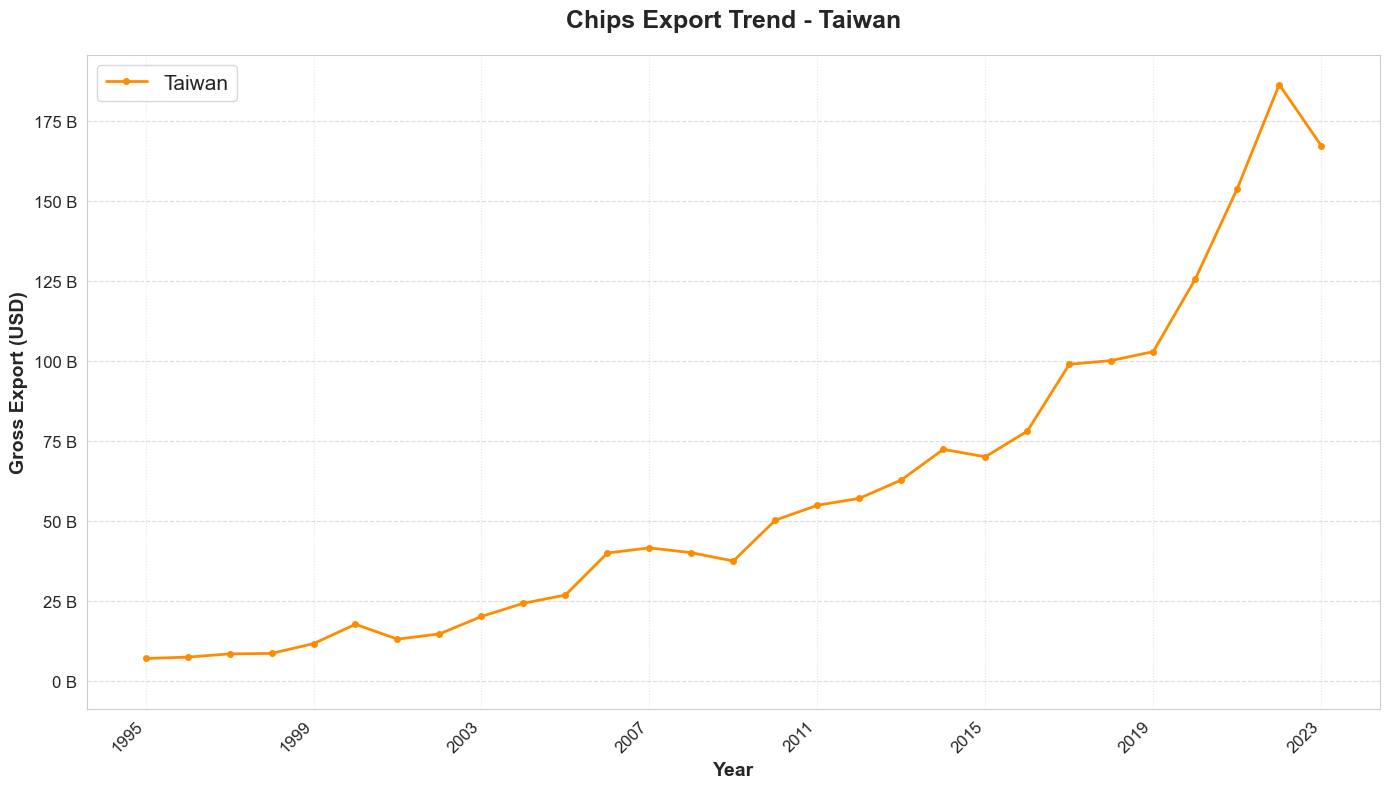

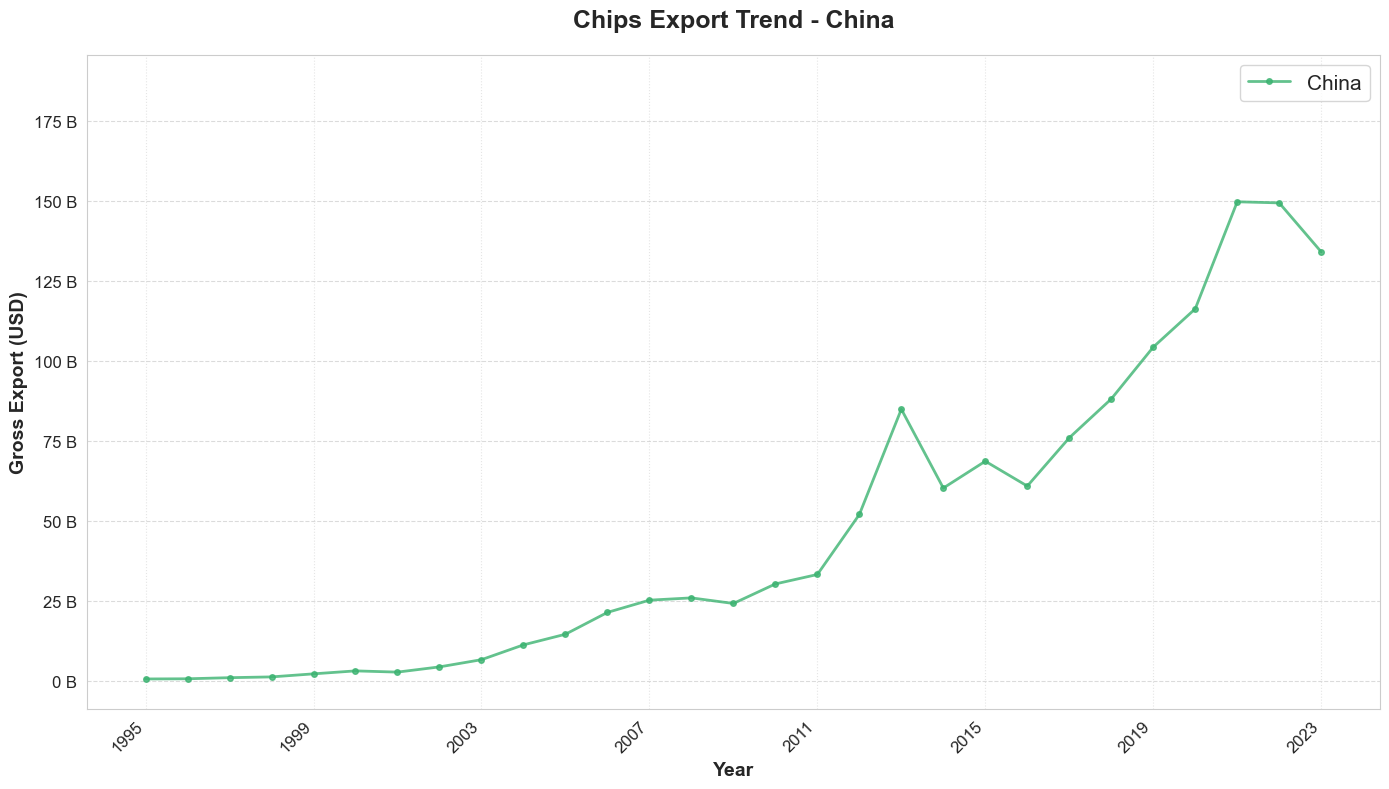

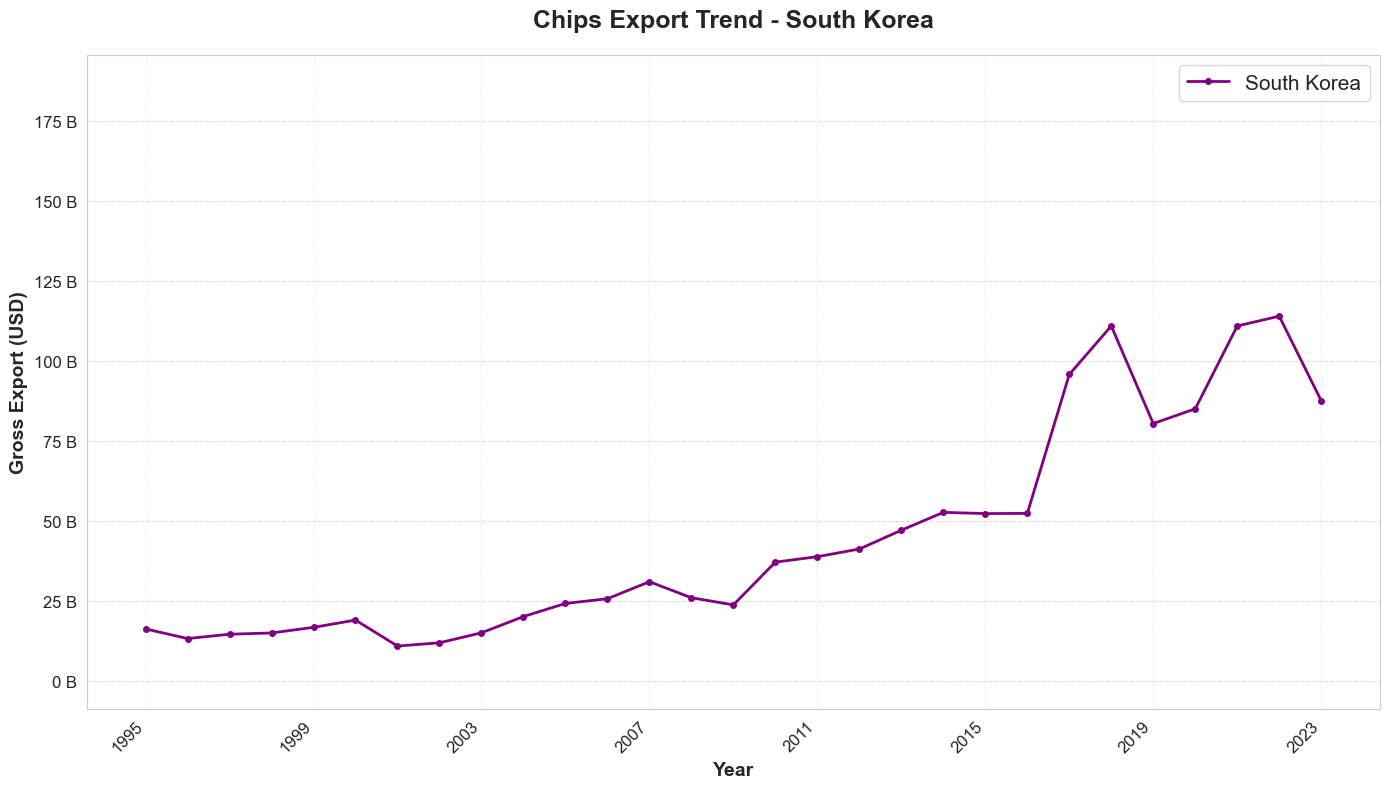

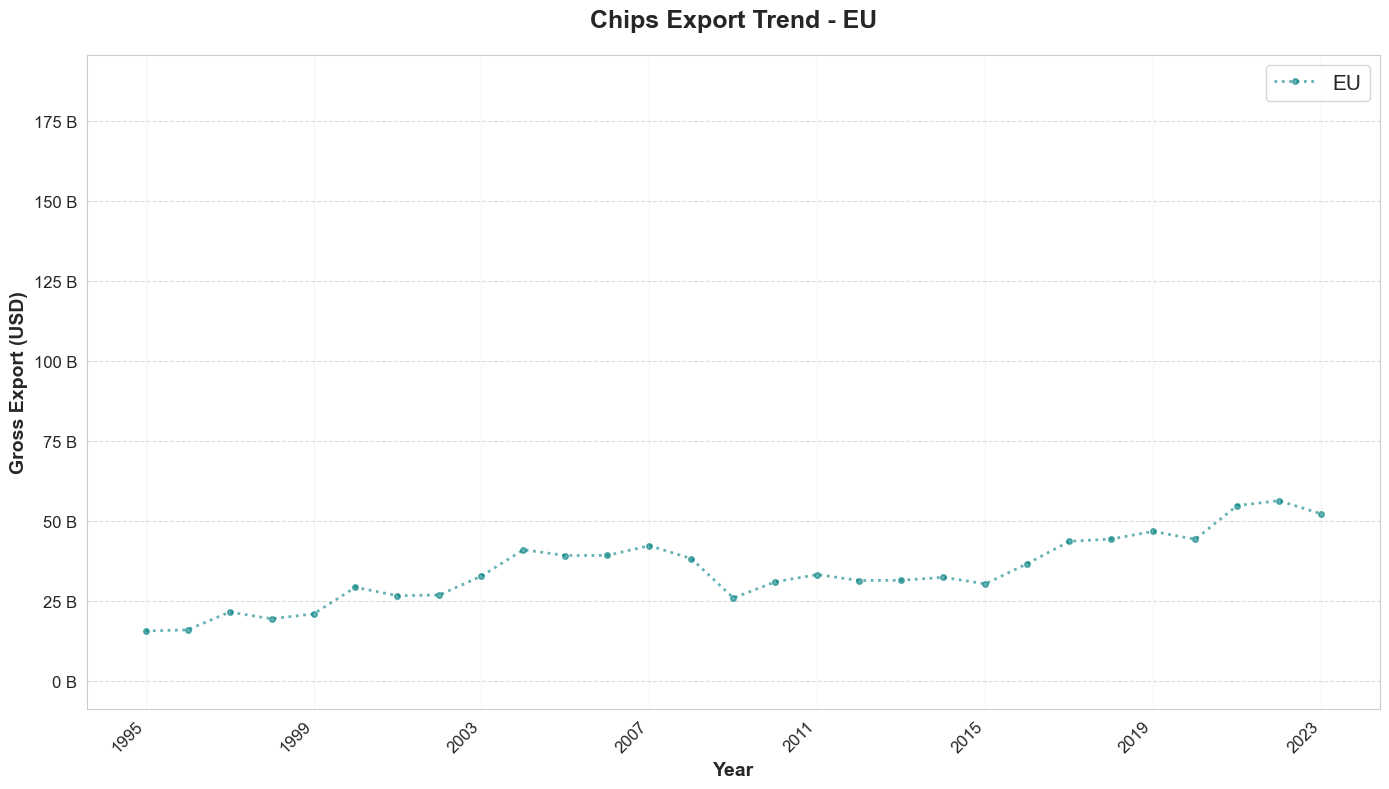

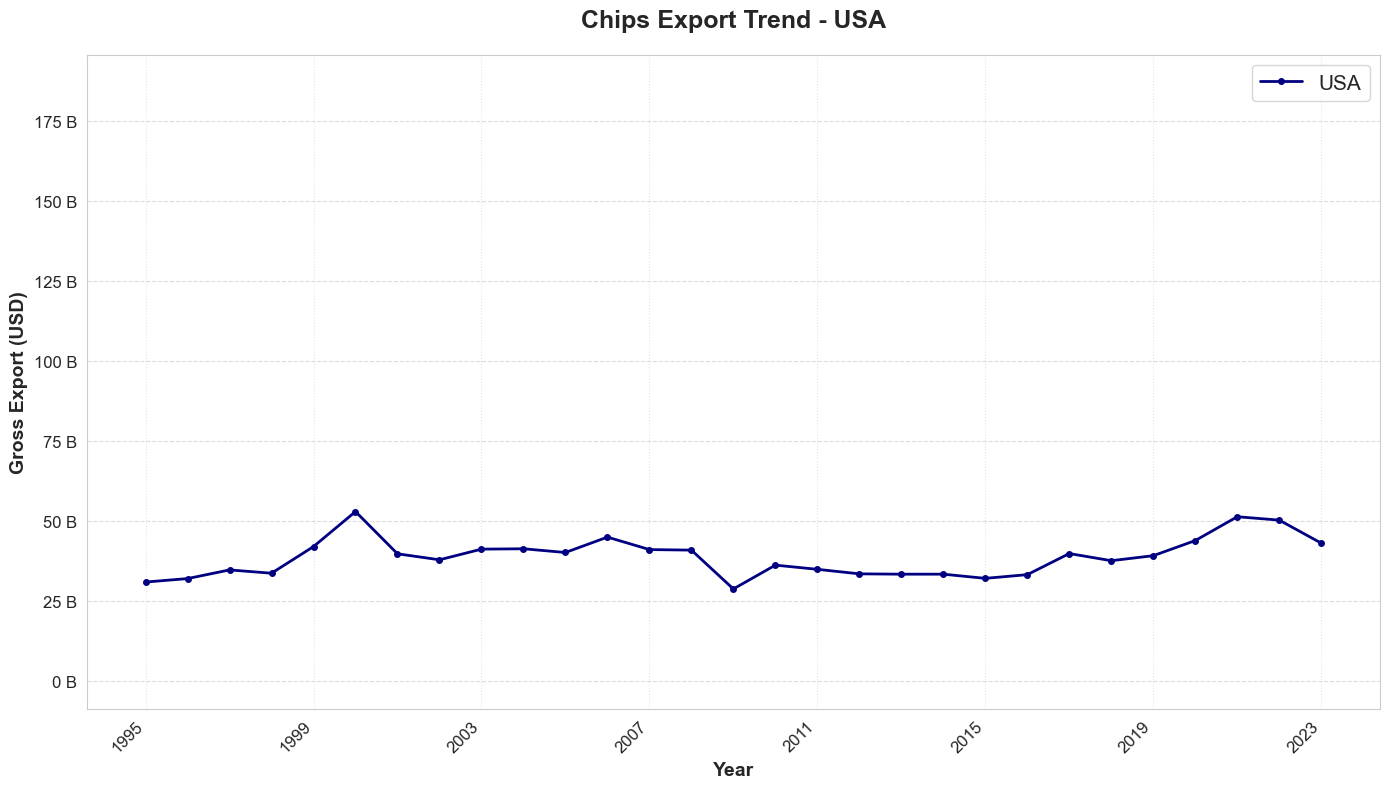

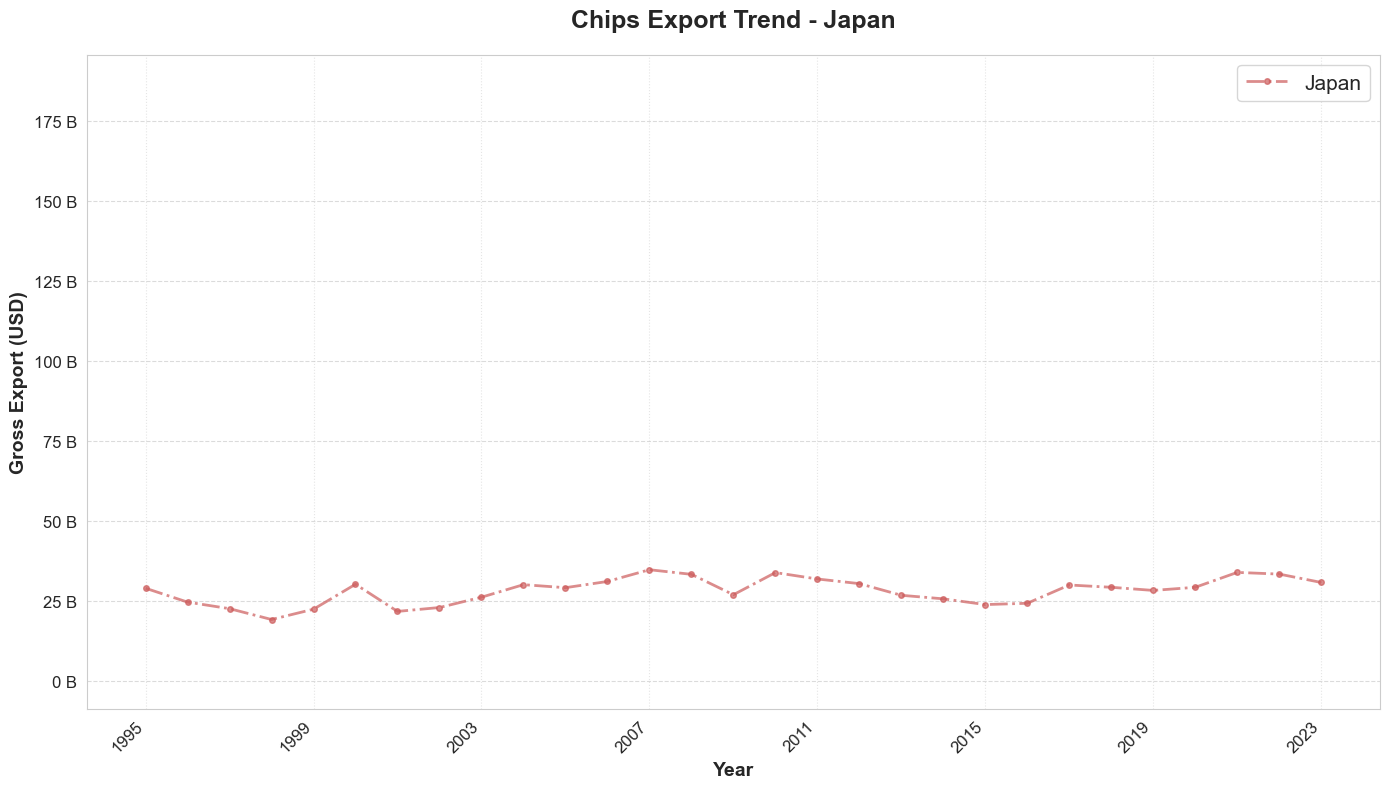

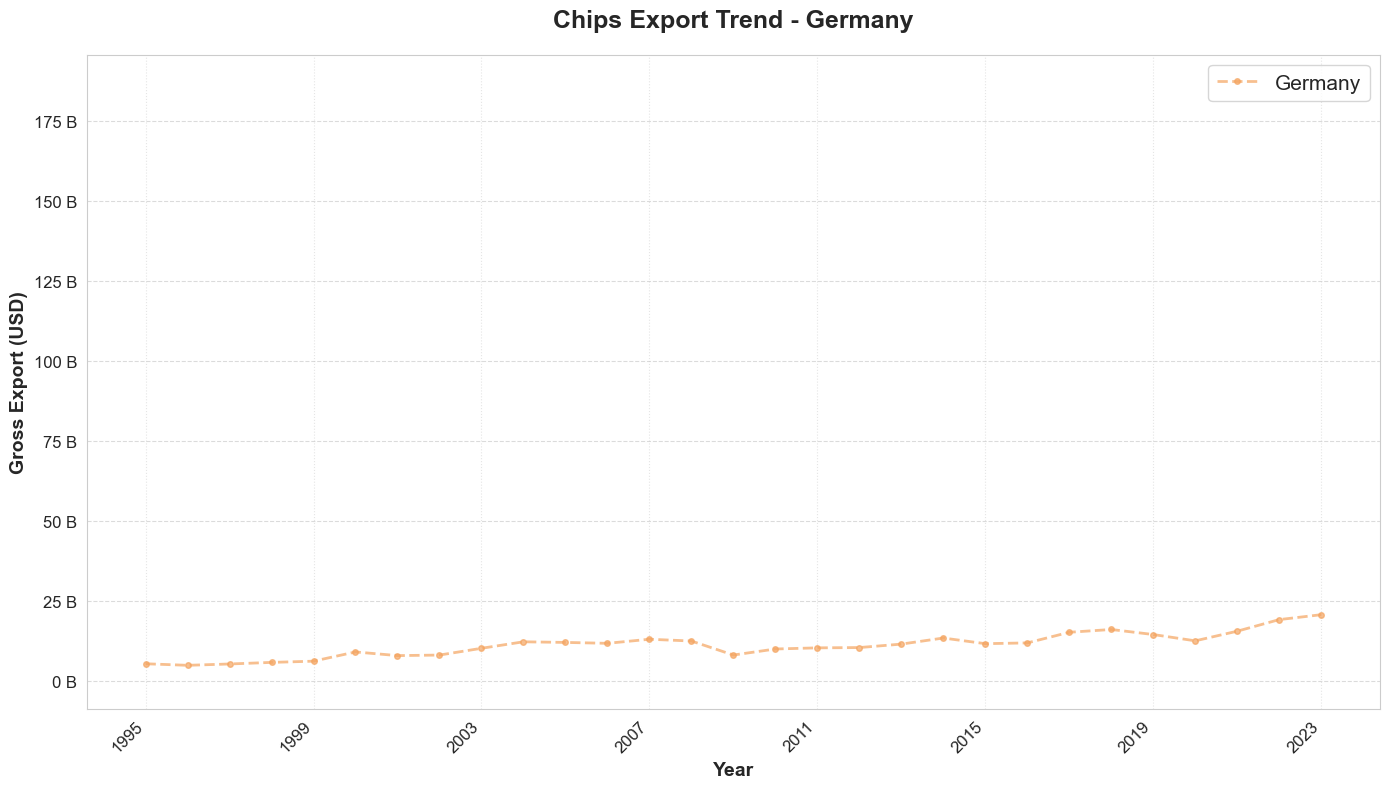

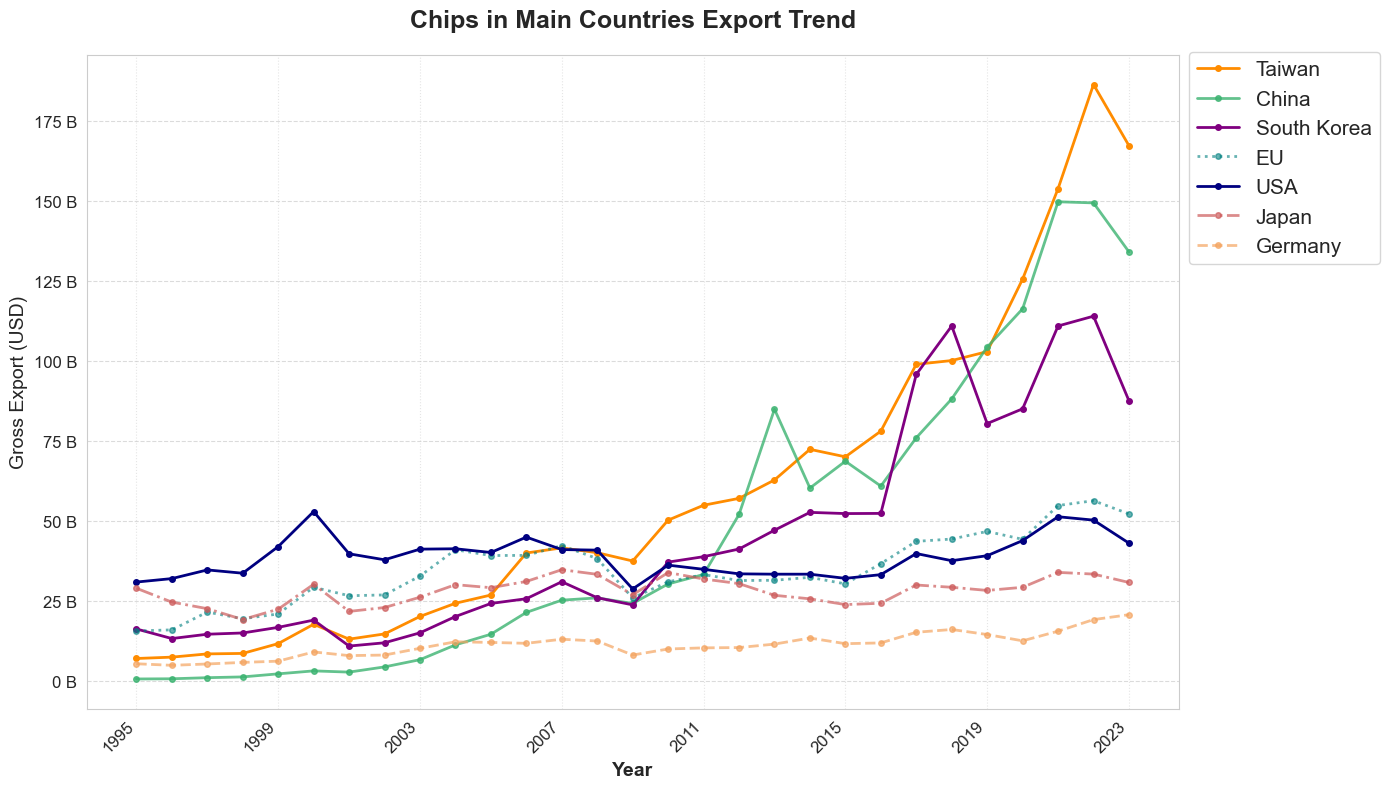

In [11]:
colors_styles_dict = {
    'China': ('mediumseagreen', 0.8, '-'),
    'USA': ('navy', 1.0, '-'),
    'Germany': ('sandybrown', 0.7, '--'),
    'Japan': ('indianred', 0.7, '-.'),
    'South Korea': ('purple', 1.0, '-'),
    'Taiwan': ('darkorange', 1.0, '-'),
    'EU': ('teal', 0.6, ':')
}

sns.set_style("whitegrid")

df_2023 = df_select[df_select['Year'] == '2023']
countries_to_plot = df_2023.sort_values('Gross Export', ascending=False)['Name'].tolist()
countries_to_plot.remove('world')


temp_fig = plt.figure(figsize=(14, 8))
for country, group in df_select.groupby('Name'):
    if country in countries_to_plot:
        color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))
        plt.plot(group['Year'], group['Gross Export'],
                 label=country,
                 color=color,
                 alpha=alpha,
                 marker='o',
                 markersize=4,
                 linewidth=2,
                 linestyle=linestyle)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} B'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5)

y_min, y_max = plt.gca().get_ylim()
plt.close(temp_fig)



for country in countries_to_plot:
    plt.figure(figsize=(14, 8))
    group = df_select[df_select['Name'] == country]

    color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))

    plt.plot(group['Year'], group['Gross Export'],
             label=country,
             color=color,
             alpha=alpha,
             marker='o',
             markersize=4,
             linewidth=2,
             linestyle=linestyle)

    plt.title(f'Chips Export Trend - {country}', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Gross Export (USD)', fontsize=14, fontweight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))

    plt.ylim(y_min, y_max)
    plt.yticks(fontsize=12)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} B'))

    plt.legend(fontsize=15)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle=':', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Create the final plot with all countries - plot in sorted order
plt.figure(figsize=(14, 8))

for country in countries_to_plot:
    group = df_select[df_select['Name'] == country]
    color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))

    plt.plot(group['Year'], group['Gross Export'],
             label=country,
             color=color,
             alpha=alpha,
             marker='o',
             markersize=4,
             linewidth=2,
             linestyle=linestyle)

plt.title('Chips in Main Countries Export Trend', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Gross Export (USD)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))

plt.ylim(y_min, y_max)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} B'))

plt.legend(fontsize=15, loc='upper left', bbox_to_anchor= (1,1.02))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5)

plt.tight_layout()

plt.show()


In [12]:
df_select['Market Share'] = df_select.apply(
    lambda row: row['Gross Export'] /
    df_select[(df_select['Name'] == 'world') & (df_select['Year'] == row['Year'])]['Gross Export'].values[0]*100
    if row['Name'] != 'world' else 1, axis=1)

C:\Users\asdf5\AppData\Local\Temp\ipykernel_21588\2492154966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Market Share'] = df_select.apply(


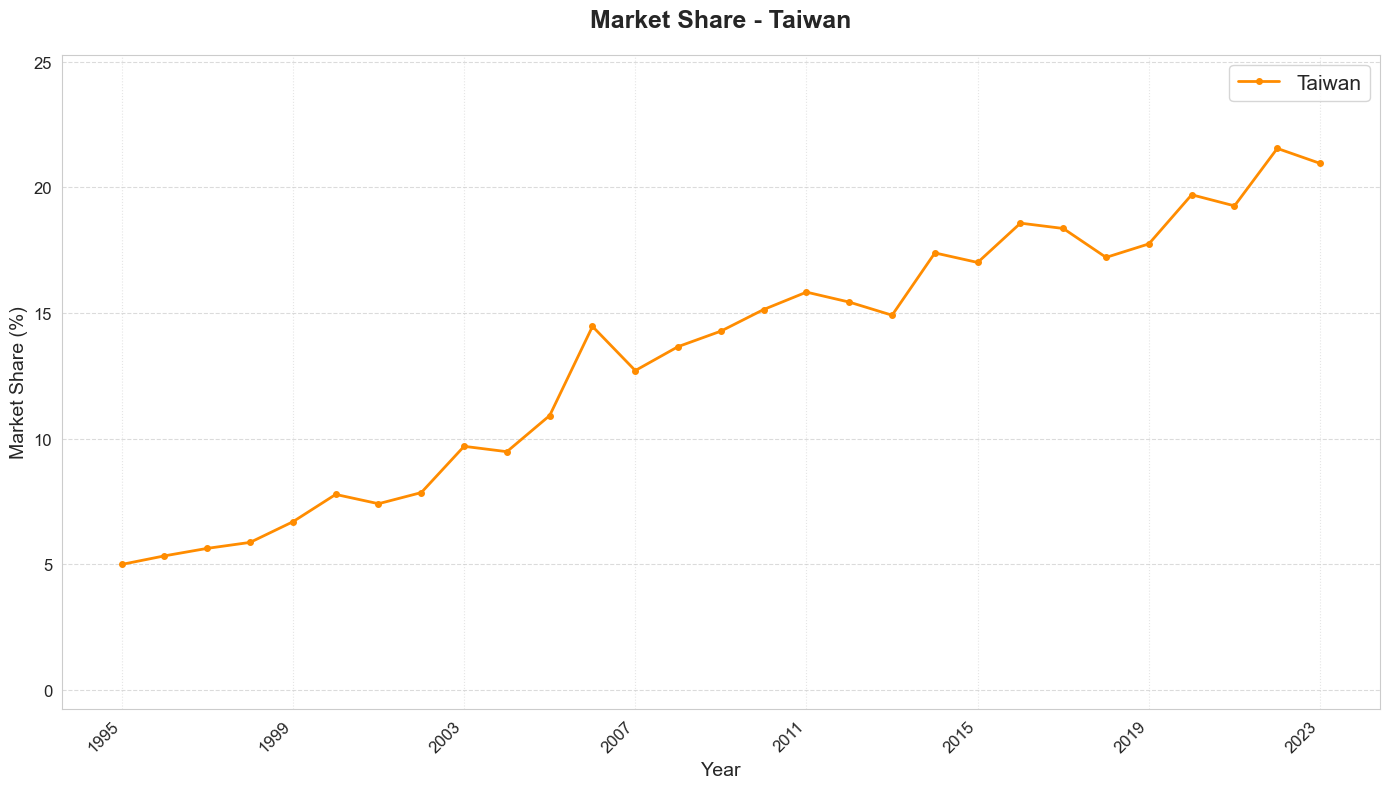

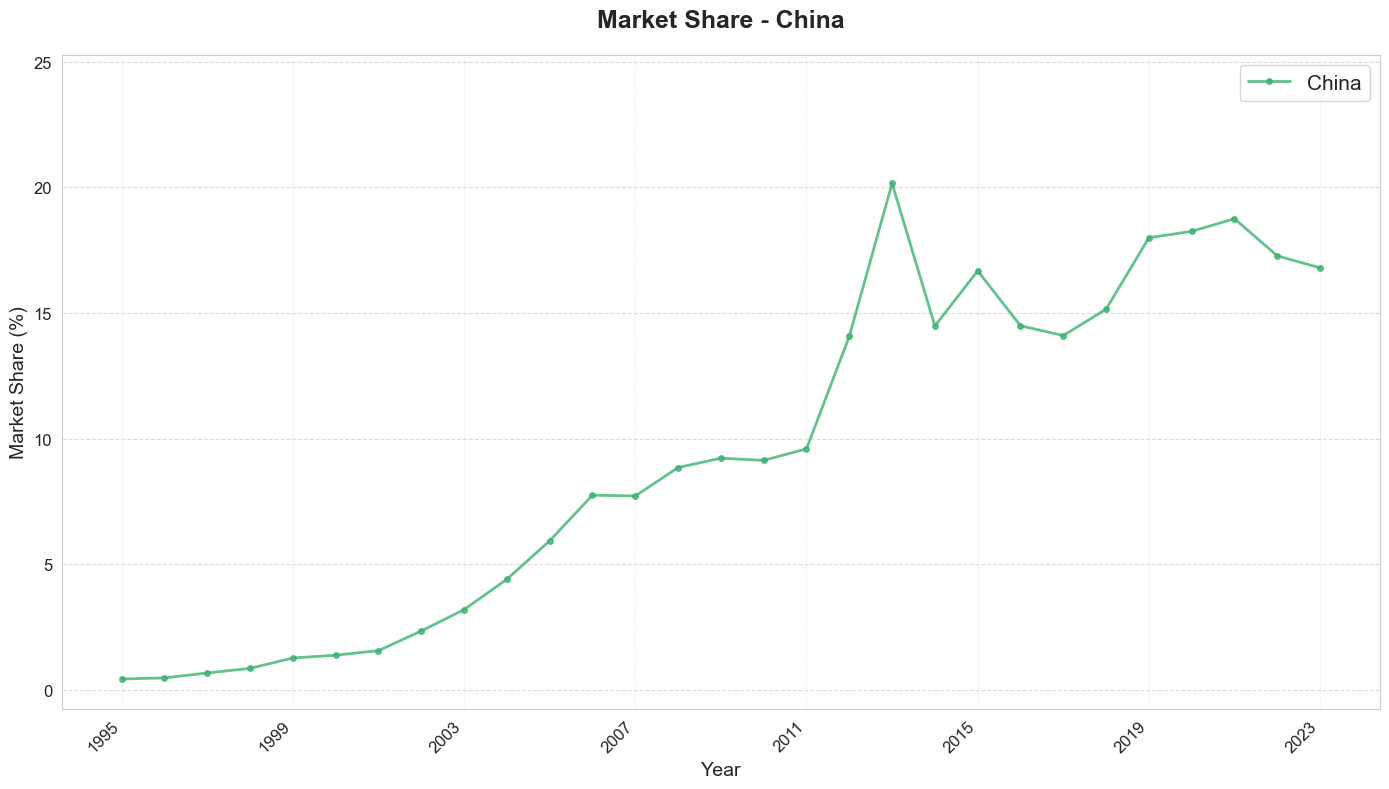

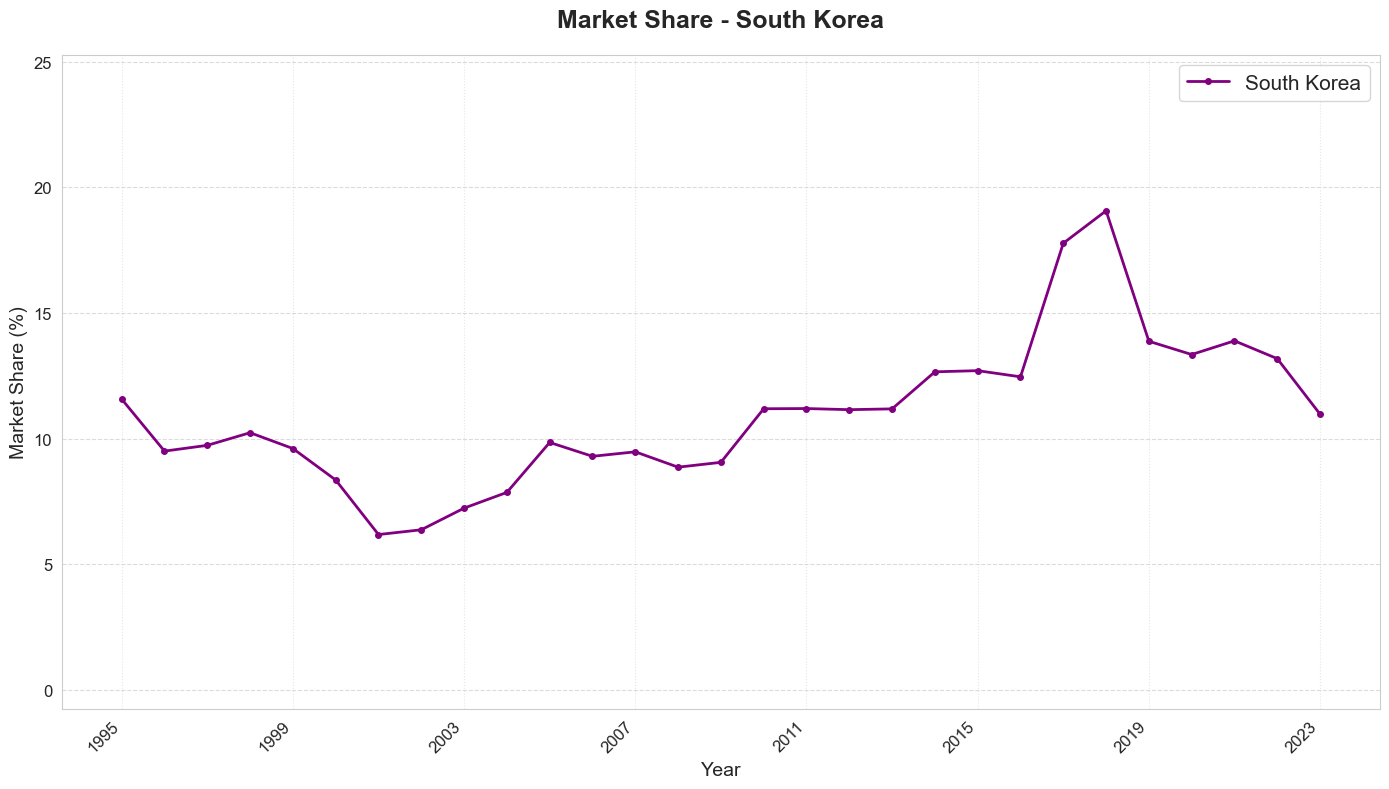

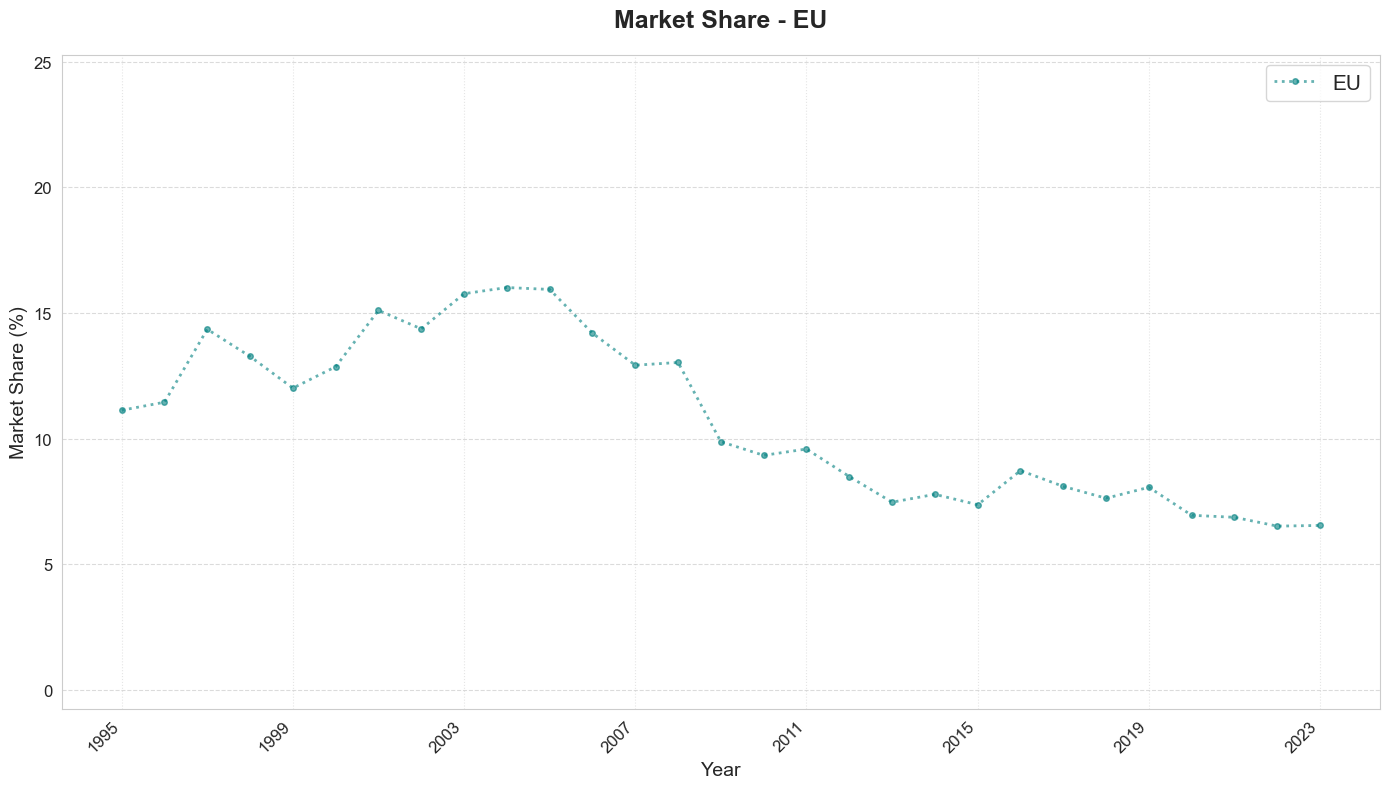

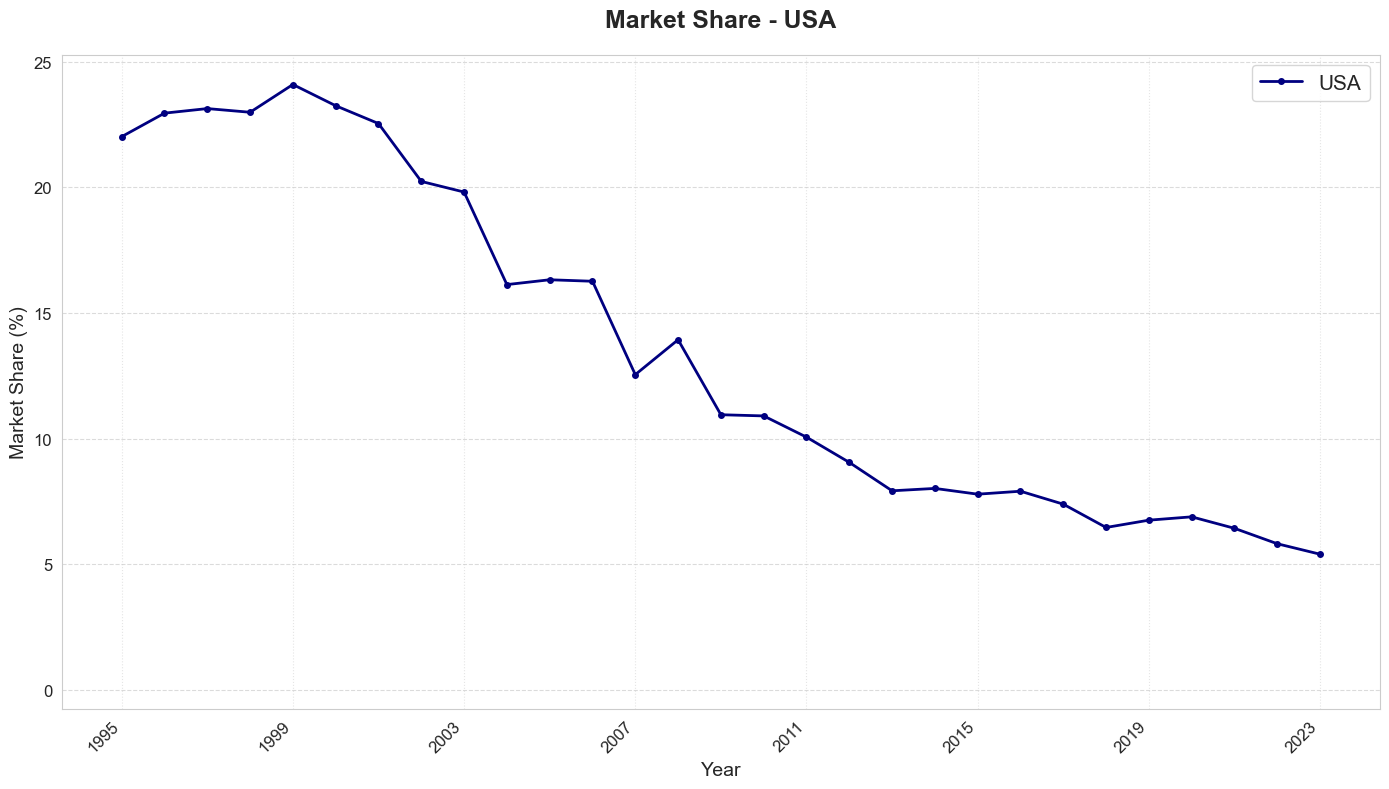

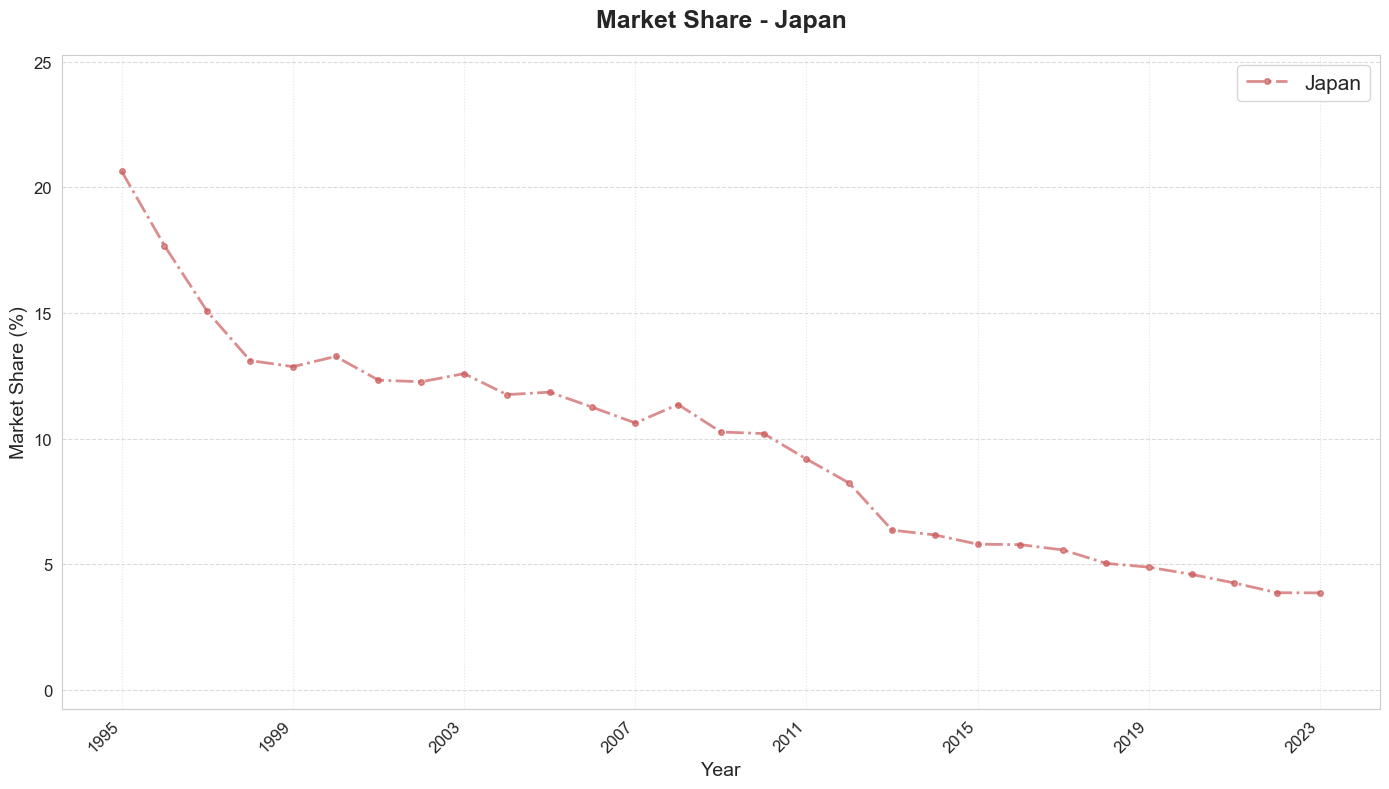

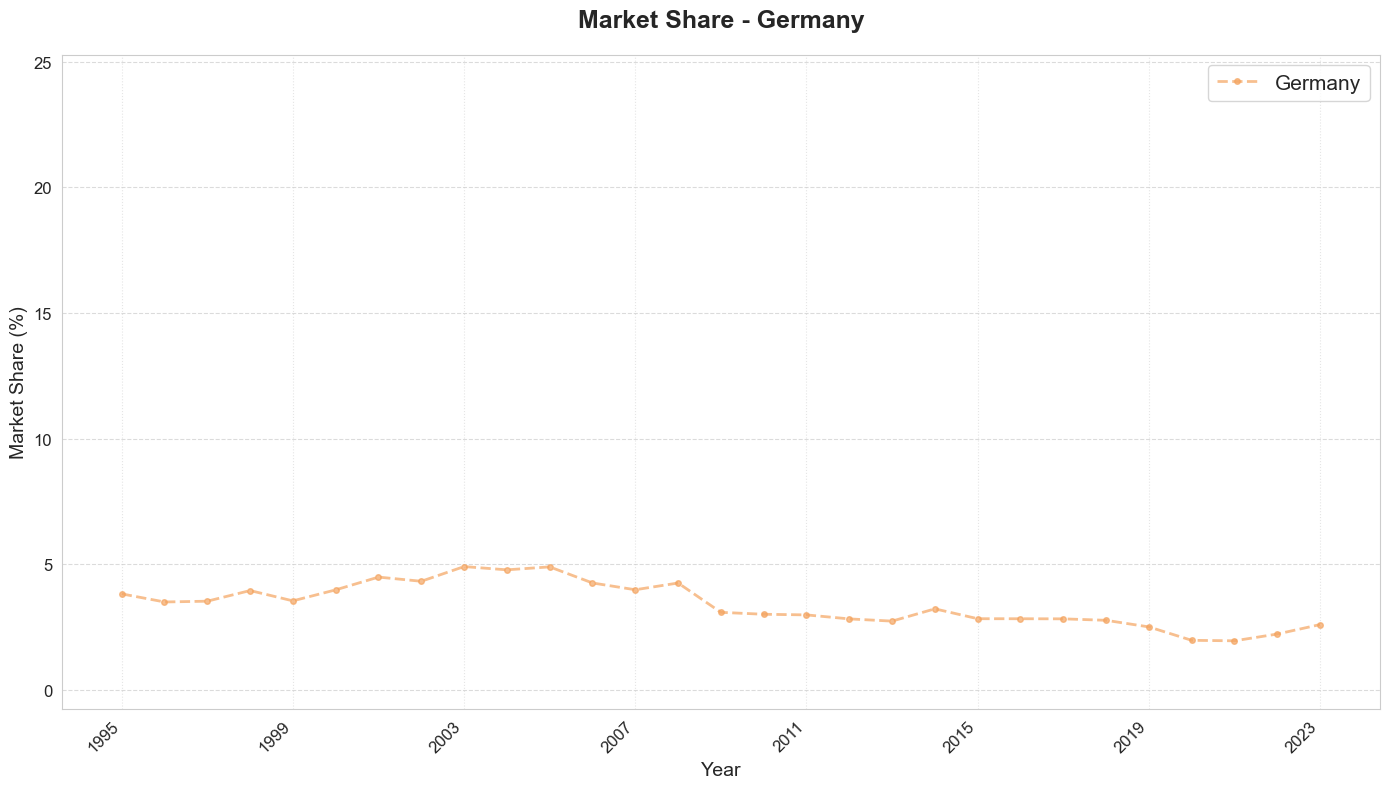

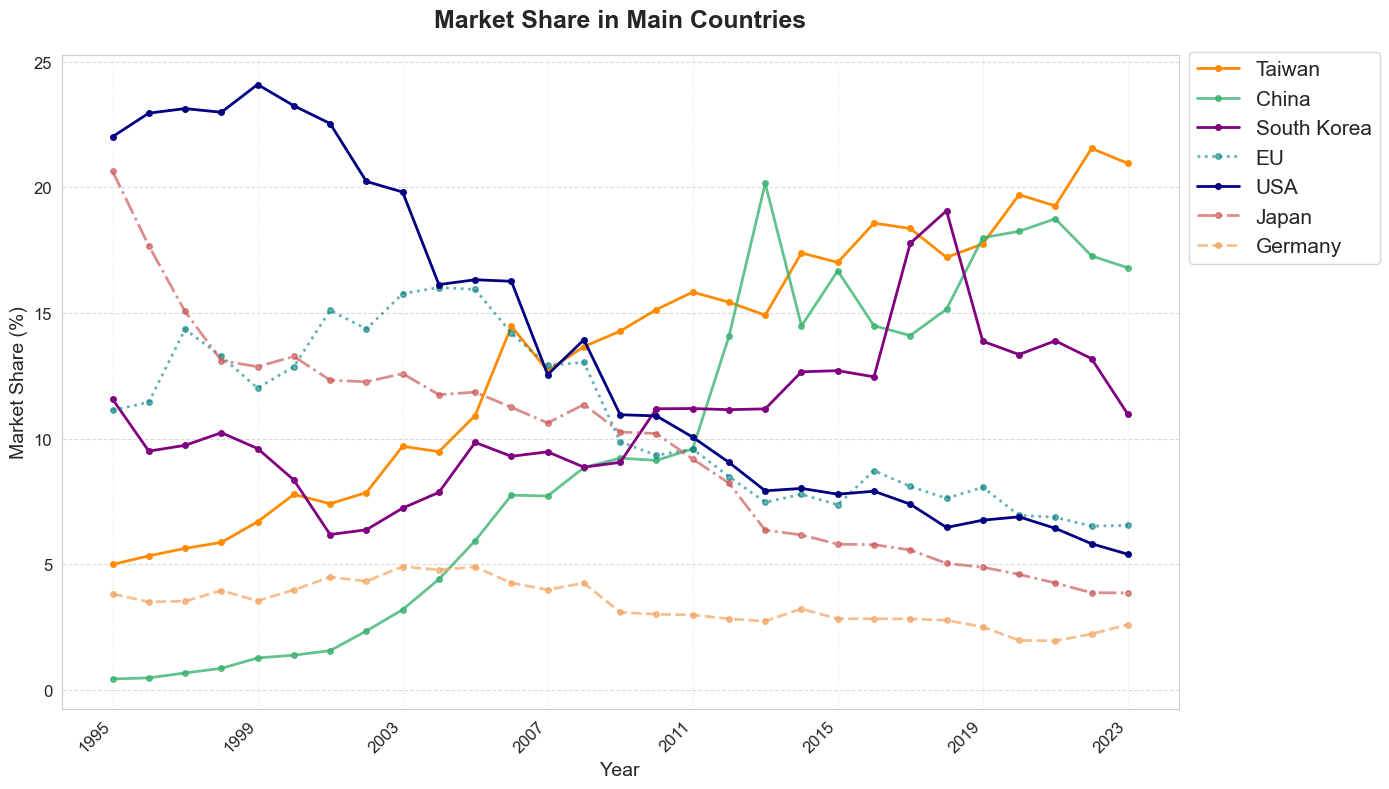

In [13]:
temp_fig = plt.figure(figsize=(14, 8))
for country, group in df_select.groupby('Name'):
    if country in countries_to_plot:
        color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))
        plt.plot(group['Year'], group['Market Share'],
                 label=country,
                 color=color,
                 alpha=alpha,
                 marker='o',
                 markersize=4,
                 linewidth=2,
                 linestyle=linestyle)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} B'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5)

y_min, y_max = plt.gca().get_ylim()
plt.close(temp_fig)



for country in countries_to_plot:
    plt.figure(figsize=(14, 8))
    group = df_select[df_select['Name'] == country]

    color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))

    plt.plot(group['Year'], group['Market Share'],
             label=country,
             color=color,
             alpha=alpha,
             marker='o',
             markersize=4,
             linewidth=2,
             linestyle=linestyle)

    plt.title(f'Market Share - {country}', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Market Share (%)', fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))

    plt.ylim(y_min, y_max)
    plt.yticks(fontsize=12)

    plt.legend(fontsize=15)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle=':', alpha=0.5)

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(14, 8))
for country in countries_to_plot:
    group = df_select[df_select['Name'] == country]
    color, alpha, linestyle = colors_styles_dict.get(country, ('gray', 0.5, '-'))

    plt.plot(group['Year'], group['Market Share'],
             label=country,
             color=color,
             alpha=alpha,
             marker='o',
             markersize=4,
             linewidth=2,
             linestyle=linestyle)

plt.title('Market Share in Main Countries', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)

#  Set x-ticks to show every 5 years
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))

plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5)

plt.tight_layout()

plt.show()


In [14]:
df_select['Gross Export'] = pd.to_numeric(df_select['Gross Export'], errors='coerce')
df_select = df_select.sort_values(['Name', 'Year'])
df_select['YoY'] = df_select.groupby('Name')['Gross Export'].pct_change() * 100


C:\Users\asdf5\AppData\Local\Temp\ipykernel_21588\84238354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Gross Export'] = pd.to_numeric(df_select['Gross Export'], errors='coerce')


In [15]:
from adjustText import adjust_text

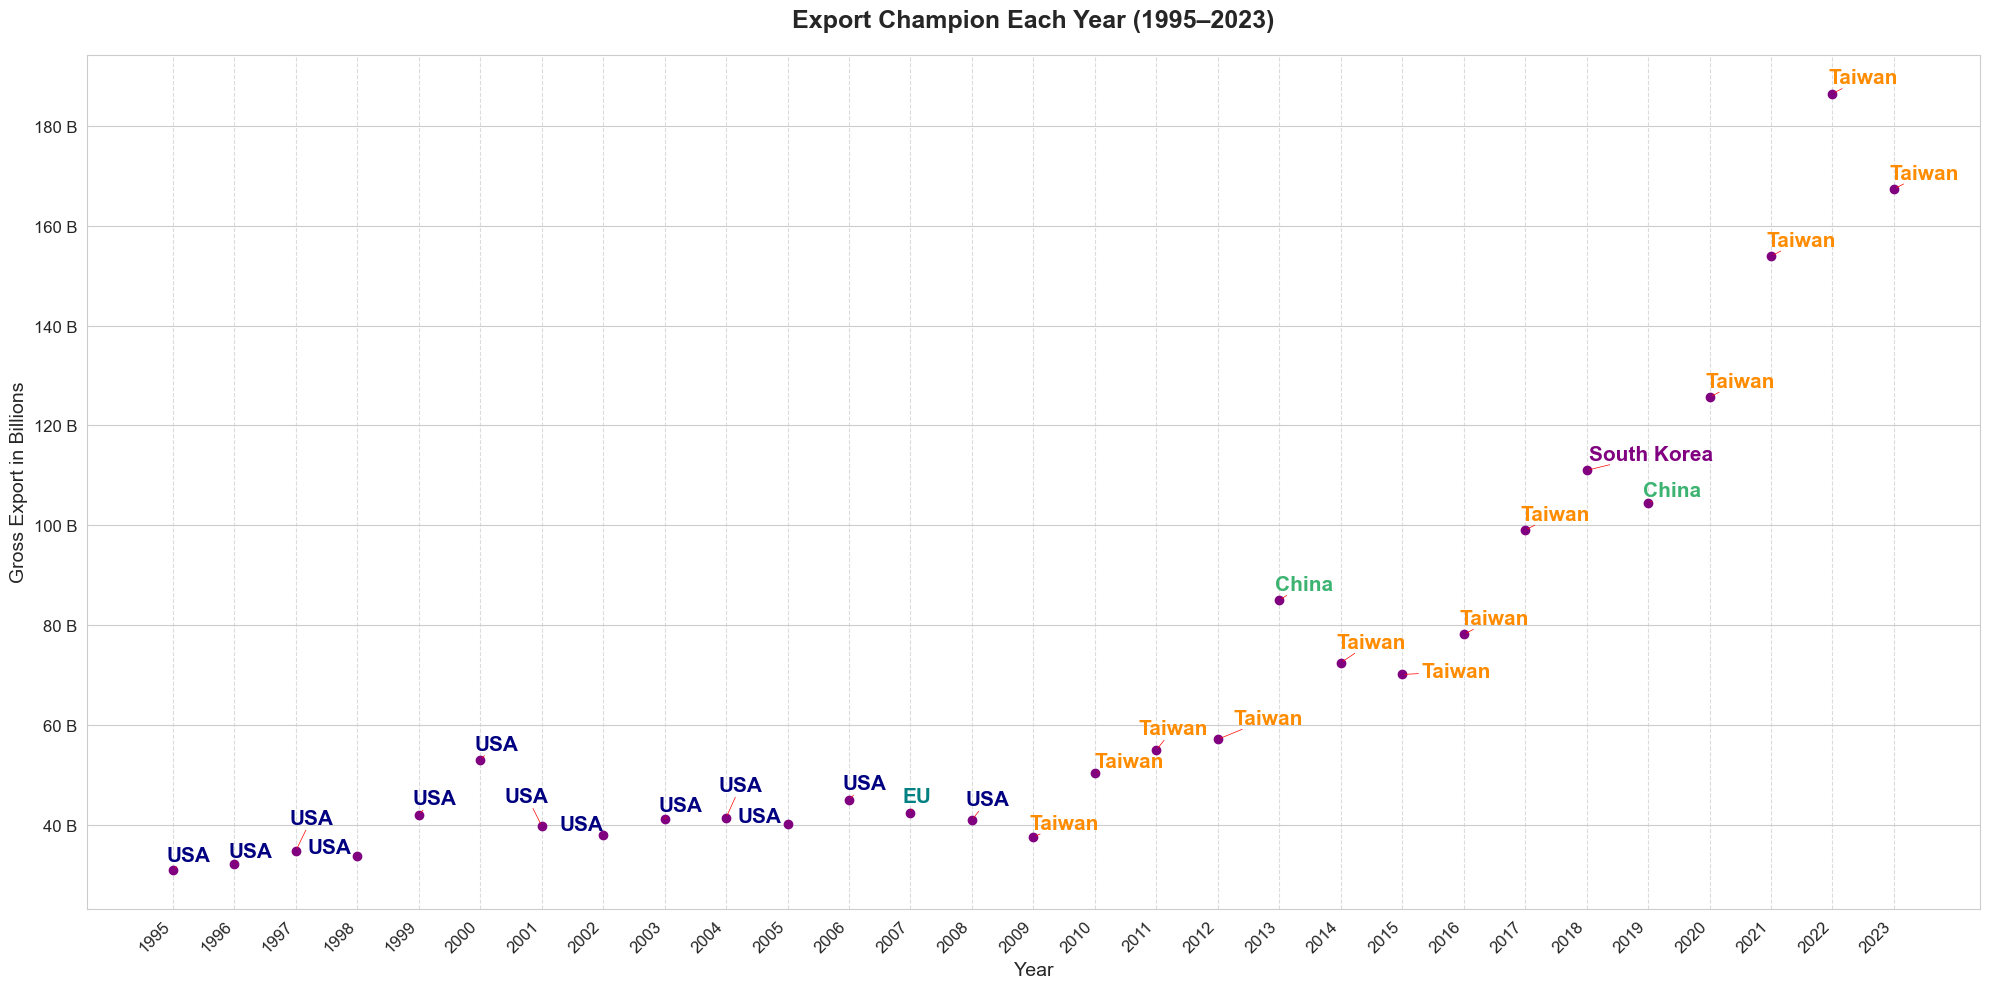

In [16]:
top_country_each_year = (
    df_select.groupby(["Year", "Name"])["Gross Export"].sum()
    .reset_index()
    .sort_values(["Year", "Gross Export"], ascending=[True, False])
    .groupby("Year")
    .nth(1)
)
top_country_each_year.head()

top_country_each_year_reset = top_country_each_year.reset_index()

plt.figure(figsize=(20, 10))
plt.scatter(top_country_each_year_reset["Year"],top_country_each_year_reset["Gross Export"], c="purple")
texts = []
for _, row in top_country_each_year_reset.iterrows():
    text_color = colors_styles_dict.get(row["Name"], ("gray", 0.5, "-"))[0]
    texts.append(
        plt.text(
            row["Year"],
            row["Gross Export"],
            row["Name"],
            fontsize=15,
            fontweight='bold',
            color=text_color,
            ha="center",
            va="bottom"
        )
    )


adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0.5))
plt.title("Export Champion Each Year (1995–2023)", fontsize=18, fontweight='bold', pad=20)
plt.ylabel("Gross Export in Billions", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.0f} B'))

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

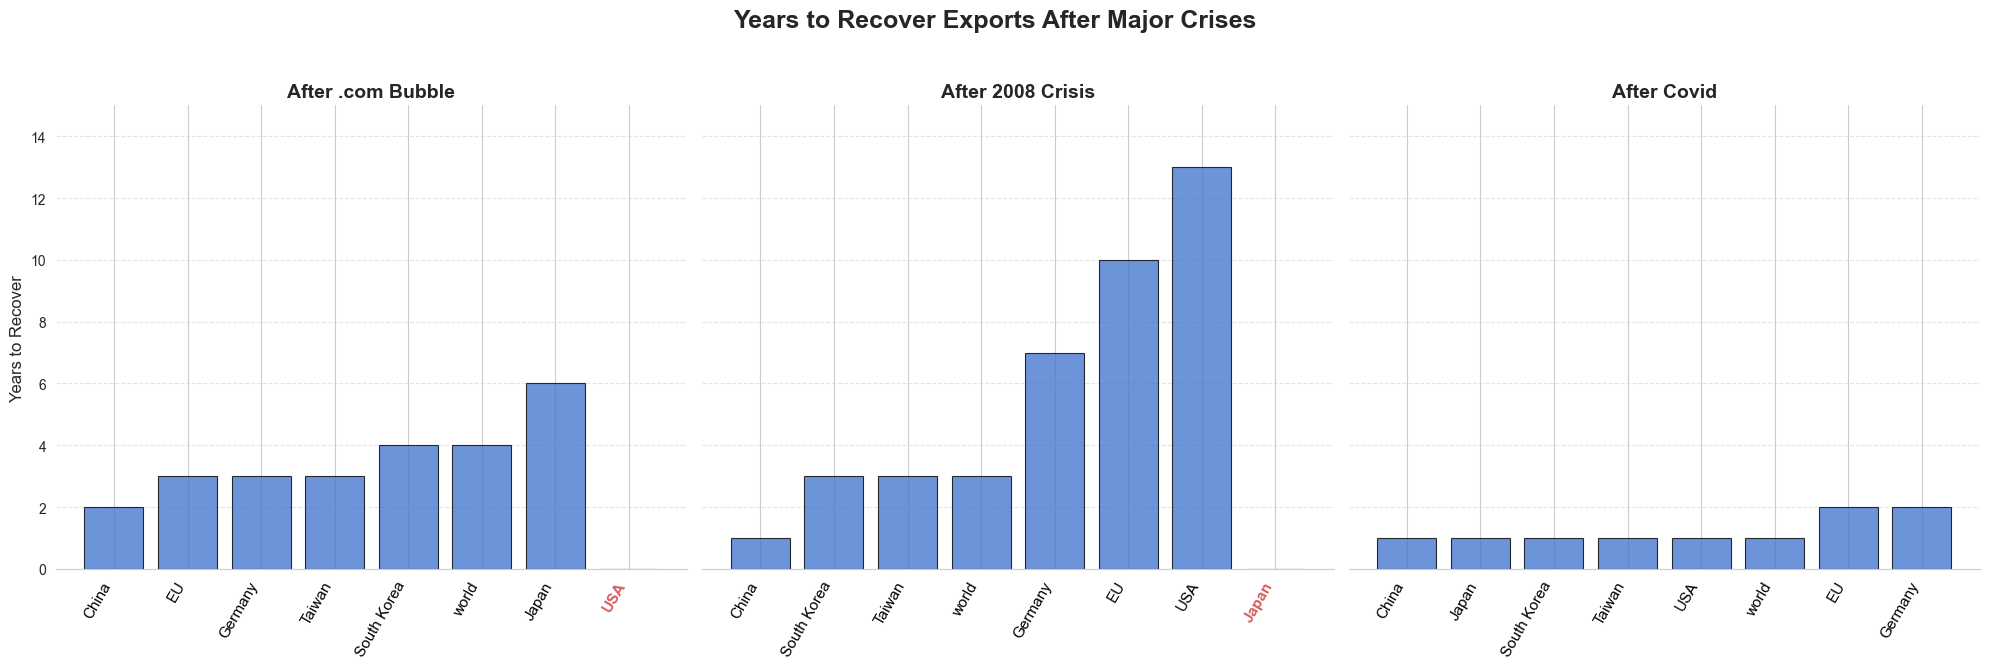

In [17]:
df_select['Year'] = df_select['Year'].astype(int)
pivot_all = df_select.pivot(index="Year", columns="Name", values="Gross Export")

def recovery_years(country, series, crisis_year_start):
    crisis_year_end = crisis_year_start + 1
    if crisis_year_start in series.index and crisis_year_end in series.index:
        pre_crisis = series.loc[crisis_year_start]
        post_crisis = series.loc[crisis_year_end:]
        recovery = post_crisis[post_crisis >= pre_crisis]
        if not recovery.empty:
            return recovery.index[0] - crisis_year_start
        else:
            return np.nan
    return np.nan

crisis_years = [
    (2000, '.com Bubble', "After .com Bubble"),
    (2007, '2008 Crisis', "After 2008 Crisis"),
    (2019, 'Covid', "After Covid")
]


fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)


fig.suptitle("Years to Recover Exports After Major Crises", fontsize=18, fontweight='bold')


colors = sns.color_palette("muted")
color_valid = colors[0]
color_nan_text = colors[3]


for ax, (crisis_start, crisis_name, title) in zip(axes, crisis_years):


    recovery_dict = {}
    for country in pivot_all.columns:
        series = pivot_all[country].dropna()
        recovery_dict[country] = recovery_years(country, series, crisis_start)


    sorted_recovery = sorted(recovery_dict.items(), key=lambda x: (np.isnan(x[1]), x[1]))


    countries_list = [item[0] for item in sorted_recovery]
    values_list = [item[1] for item in sorted_recovery]


    bar_colors = []
    xtick_colors = []
    plot_values = []

    for v in values_list:
        if np.isnan(v):
            plot_values.append(0)
            bar_colors.append('whitesmoke')
            xtick_colors.append(color_nan_text)
        else:
            plot_values.append(v)
            bar_colors.append(color_valid)
            xtick_colors.append('black')


    ax.bar(range(len(countries_list)), plot_values,
           color=bar_colors,
           edgecolor='black',
           linewidth=0.8,
           alpha=0.8)


    ax.set_title(title, fontsize=14, fontweight='bold')

    ax.set_xticks(range(len(countries_list)))
    ax.set_xticklabels(countries_list, rotation=60, ha='right', fontsize=11)

    for ticklabel, color in zip(ax.get_xticklabels(), xtick_colors):
        ticklabel.set_color(color)
        if color == color_nan_text:
            ticklabel.set_fontweight('bold') # NaN 標籤加粗


    ax.grid(axis='y', alpha=0.5, linestyle='--')


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False) # 也可以考慮隱藏左邊框
    ax.set_ylim(bottom=0, top=15)


    ax.set_ylim(bottom=0)


    if ax == axes[0]:
        ax.set_ylabel("Years to Recover", fontsize=12)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

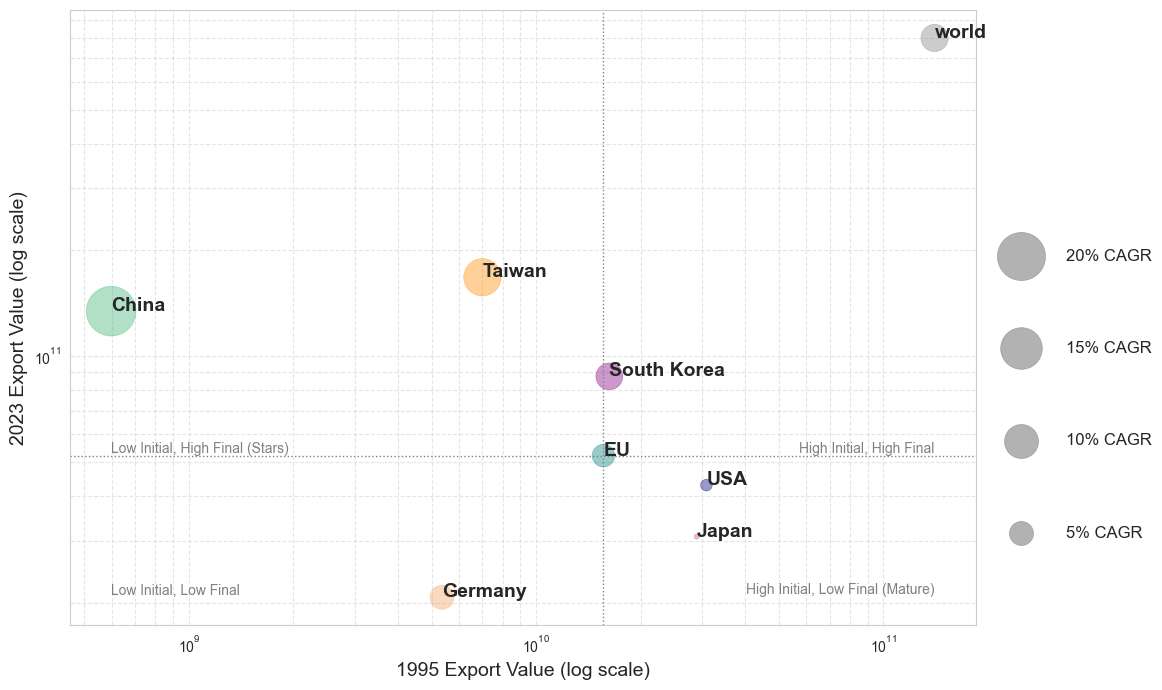

In [18]:
import matplotlib.colors as mcolors
cagr_dict = {}
for country in pivot_all.columns:
    series = pivot_all[country].dropna()
    if 1995 in series.index and 2023 in series.index:
        cagr = (series.loc[2023] / series.loc[1995]) ** (1 / (2023-1995)) - 1
        cagr_dict[country] = {
            "1995": series.loc[1995],
            "2023": series.loc[2023],
            "CAGR": cagr
        }

cagr_df = pd.DataFrame(cagr_dict).T.dropna()


color_list = []
default_color = 'gray'
default_alpha = 0.5

for country in cagr_df.index:
    if country in colors_styles_dict:
        color_name, alpha, _ = colors_styles_dict[country]
        rgba = mcolors.to_rgba(color_name, alpha=alpha)
        color_list.append(rgba)
    elif country == 'world':
        color_list.append(mcolors.to_rgba('gray', alpha=0.3))
    else:
        color_list.append(mcolors.to_rgba(default_color, alpha=default_alpha))

plt.figure(figsize=(14,7))
BUBBLE_SCALE = 6000


plt.scatter(
    cagr_df["1995"],
    cagr_df["2023"],
    s=cagr_df["CAGR"] * BUBBLE_SCALE,
    c=color_list,
    alpha=0.4,
    linewidth=0.5
)

texts = []
for country, row in cagr_df.iterrows():
    texts.append(
        plt.text(
            row["1995"],
            row["2023"],
            country,
            fontsize=14,
            fontweight='bold',
            ha='left'
        )
    )


# Four Quadrants Credit to ChatGPT

median_1995 = cagr_df.drop('world')["1995"].median()
median_2023 = cagr_df.drop('world')["2023"].median()
plt.axvline(x=median_1995, color='gray', linestyle=':', linewidth=1)
plt.axhline(y=median_2023, color='gray', linestyle=':', linewidth=1)

plt.text(cagr_df["1995"].min(), median_2023, "Low Initial, High Final (Stars)",
         va='bottom', ha='left', color='gray', fontsize=10)
plt.text(cagr_df["1995"].max(), median_2023, "High Initial, High Final",
         va='bottom', ha='right', color='gray', fontsize=10)
plt.text(cagr_df["1995"].min(), cagr_df["2023"].min(), "Low Initial, Low Final",
         va='bottom', ha='left', color='gray', fontsize=10)
plt.text(cagr_df["1995"].max(), cagr_df["2023"].min(), "High Initial, Low Final (Mature)",
         va='bottom', ha='right', color='gray', fontsize=10)



ax = plt.gca()
legend_cagrs = [0.05, 0.10, 0.15, 0.20]
legend_labels = ["5% CAGR", "10% CAGR", "15% CAGR", "20% CAGR"]
legend_bubbles = [cagr * BUBBLE_SCALE for cagr in legend_cagrs]
x_pos = 1.05
y_start = 0.15
y_step = 0.15
for i, size in enumerate(legend_bubbles):
    y_pos = y_start + (i * y_step)
    ax.scatter(x_pos, y_pos, s=size,
               alpha=0.6, linewidth=0.5, color='gray',
               transform=ax.transAxes,
               clip_on=False)
    ax.text(x_pos + 0.05, y_pos, legend_labels[i],
            va='center', fontsize=12,
            transform=ax.transAxes,
            clip_on=False)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("1995 Export Value (log scale)", fontsize=14)
plt.ylabel("2023 Export Value (log scale)", fontsize=14)
plt.grid(True, which="both", linestyle="--", alpha=0.5)


plt.tight_layout(rect=[0, 0, 0.85, 1])

In [20]:
import bar_chart_race as bcr
pivot = df_10.pivot(index="Year", columns="Name", values="Gross Export")
pivot.index = pd.to_datetime(pivot.index.astype(str), format='%Y')

In [21]:
# Credit to ChatGPT
bcr.bar_chart_race(
    df=pivot,
    filename='top10_race.gif',
    n_bars=10,
    title='Top 10 Exporters Over Time (1995–2023)',
    steps_per_period=100,
    interpolate_period=True,
    period_length=2000,
    period_fmt='%Y',
    figsize=(20, 10),
    tick_label_size = 15
)

C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\asdf5\Desktop\FS\DA\1\.venv\Lib\site-packages\bar_char

In [31]:
import geopandas as gpd

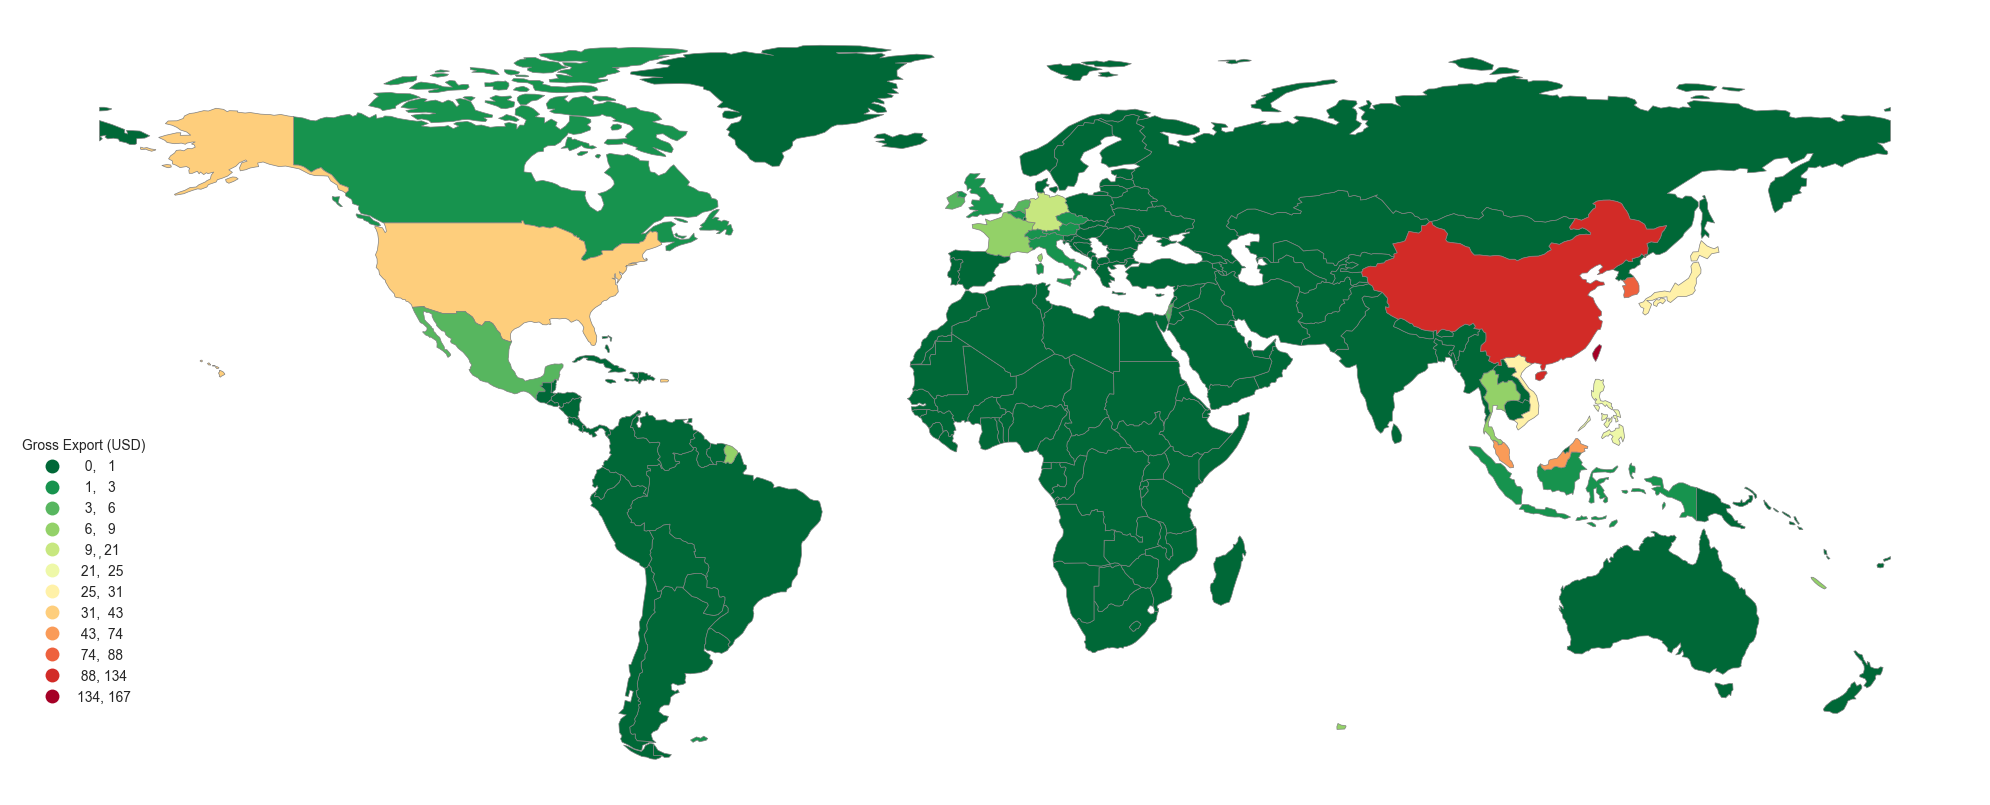

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt


df_2023_map = df_long[df_long["Year"] == '2023'].copy()


df_2023_map['Name'] = df_2023_map['Name'].replace({
    'USA': 'United States of America',
    'Turkiye': 'Turkey',
    'Tanzania': 'United Republic of Tanzania'
})


url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

world = world[world['SOVEREIGNT'] != 'Antarctica']


merged = world.merge(df_2023_map, how="left", left_on="SOVEREIGNT", right_on="Name")

import mapclassify
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

merged['Gross Export in Billions'] = merged['Gross Export'] / 1e9
merged.plot(
    column="Gross Export in Billions",
    cmap="RdYlGn_r",
    linewidth=0.5,
    edgecolor="0.5",
    legend=True,
    ax=ax,


    scheme='NaturalBreaks',
    k=12,

    legend_kwds={
        'title': "Gross Export (USD)",
        'fmt': '{:,.0f}',
        'loc': 'lower left',
        'bbox_to_anchor': (0.0, 0.1),
        'fontsize': 10,
        'frameon': False
     }
)


ax.axis('off')

plt.tight_layout()
plt.show()
